Imports:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Step 1: Validating the data (see training_data.ipynb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.21333333333333335..1.1333333333333333].


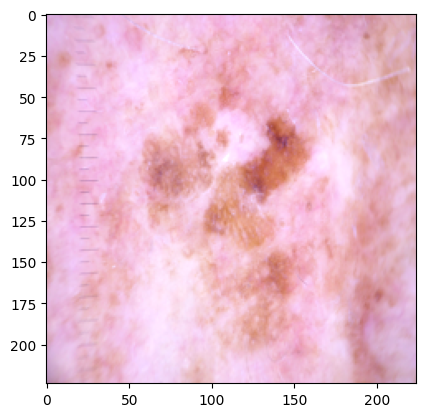

In [18]:
lesions = np.load('data/HAM_lesions.npy')
labels = np.load('data/HAM_labels.npy')

img = lesions[0]
plt.figure()
plt.imshow(img)
plt.show()

In [19]:
#splitting into training and testing data
keys = np.arange(0,len(labels))
train_keys = keys[:int(0.8*len(keys))]
test_keys = keys[int(0.8*len(keys))+1:]

train_lesions = lesions[train_keys]
train_labels = labels[train_keys]

test_lesions = lesions[test_keys]
test_labels = labels[test_keys]

print(len(test_labels))
print(len(train_labels))

2002
8012


Step 2: Creating the VGG-16 model

In [17]:
model = models.Sequential()

#start with a sequence of convolutional layers and maxpooling
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))


model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2),strides=(2,2)))

#flatten the output and and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


C:\Users\sylvi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 47, 47, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 17, 17, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,041 (56.76 MB)

 Trainable params: 14,879,041 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

Step 3: Training the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07111111111111111..1.1333333333333333].


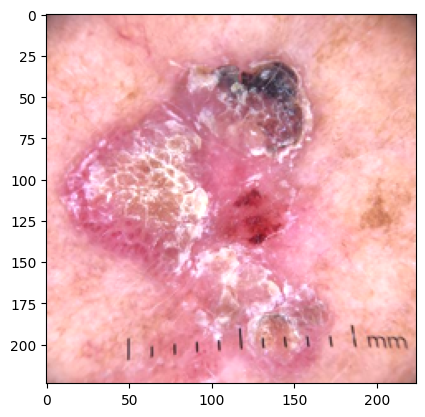

105 46 12


In [13]:
#creating extra validation sets to test racial bias
bosque_data = np.load(".\data\BOSQUE_data.npy", allow_pickle=True)
imgs = bosque_data[0]
labs = bosque_data[1]
skin = bosque_data[2]

img = imgs[0]
plt.figure()
plt.imshow(img)
plt.show()

fair_labels = labs[skin < 4]
fair_imgs = imgs[skin < 4]

dark_labels = labs[skin > 3]
dark_imgs = imgs[skin > 3]

vdark_labels = labs[skin > 4]
vdark_imgs = imgs[skin > 4]

print(len(fair_labels),len(dark_labels),len(vdark_labels))

fair_set, dark_set, vdark_set = np.empty(2, dtype=object),np.empty(2, dtype=object),np.empty(2, dtype=object)

fair_set[0],fair_set[1]=fair_imgs,fair_labels
dark_set[0],dark_set[1]=dark_imgs,dark_labels
vdark_set[0],vdark_set[1]=vdark_imgs,vdark_labels


In [26]:
test = [[] for _ in range(4)]
test[0].append(0)
test

[[0], [], [], []]

In [ ]:
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self, validation_sets):
        self.val_sets = validation_sets
        self.num_val_sets = len(validation_sets)

    def on_train_begin(self, logs=None):
        self.batch_losses = []
        self.batch_acc = []
        self.val_acc = [[] for _ in range(self.num_val_sets)]   

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs.get('loss'))
        self.batch_acc.append(logs.get('accuracy'))

        for i in range(self.num_val_sets):
            set = self.val_sets[i]
            self.val_acc[i].append(self.model.evaluate(x=set[0],
                                          y=set[1], verbose = 0))

val_sets = np.empty(3, dtype=object)
val_sets[0],val_sets[1],val_sets[2]=fair_set, dark_set, vdark_set
LH = LossHistory(val_sets)

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_lesions, train_labels, epochs=1, 
                    validation_data=(test_lesions, test_labels), callbacks = LH,batch_size = 32)

  2/251 ━━━━━━━━━━━━━━━━━━━━ 1:05:17 16s/step - accuracy: 0.7727 - loss: 0.6813

{'accuracy': [1.0, 1.0, 1.0], 'loss': [0.010721568949520588, 0.000911720038857311, 0.0004426802333910018], 'val_accuracy': [0.0, 0.0, 0.0], 'val_loss': [7.714224338531494, 8.872777938842773, 9.524080276489258]}
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


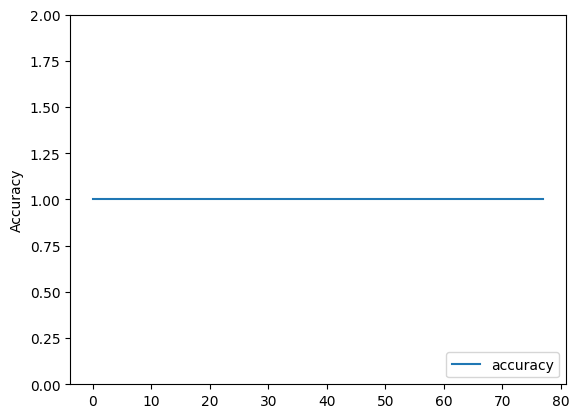

In [ ]:
plt.plot(LH.batch_acc, label='accuracy')
plt.ylabel('Accuracy')
plt.ylim([0,2])
plt.legend(loc='lower right')
print(history.history)
#test_loss, test_acc = model.evaluate(test_lesions,  test_labels, verbose=2)